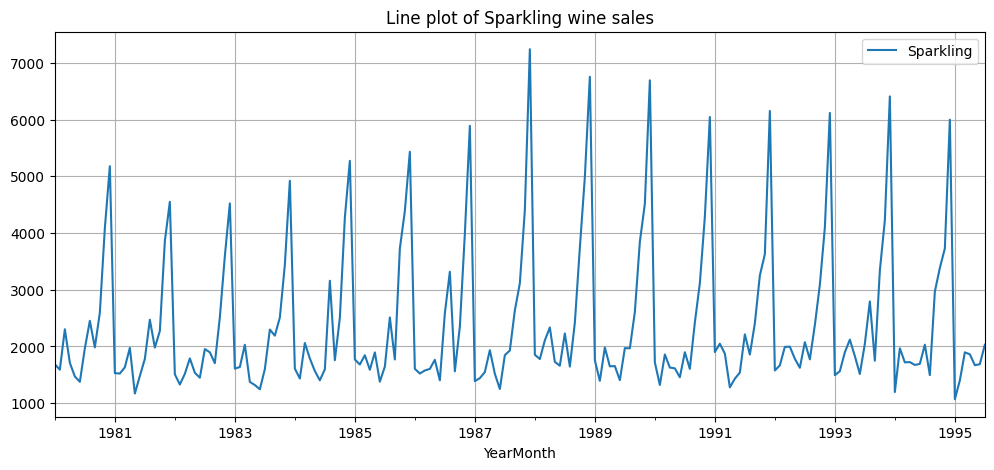

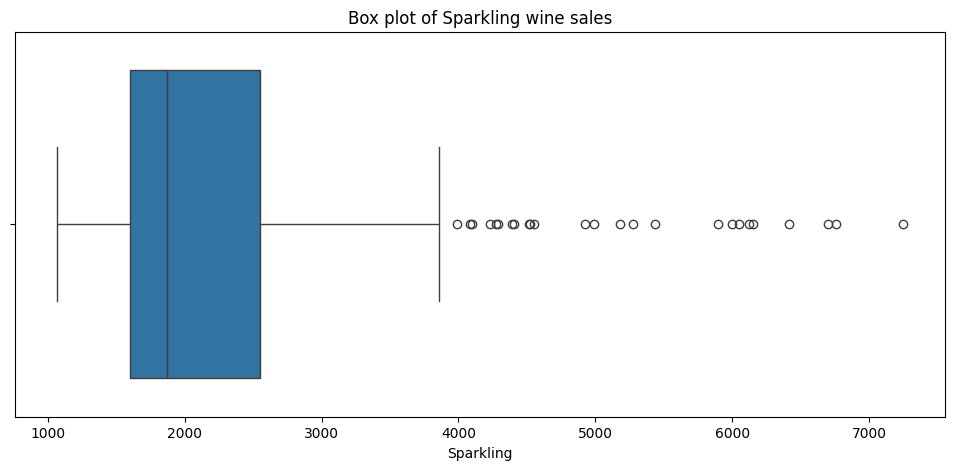

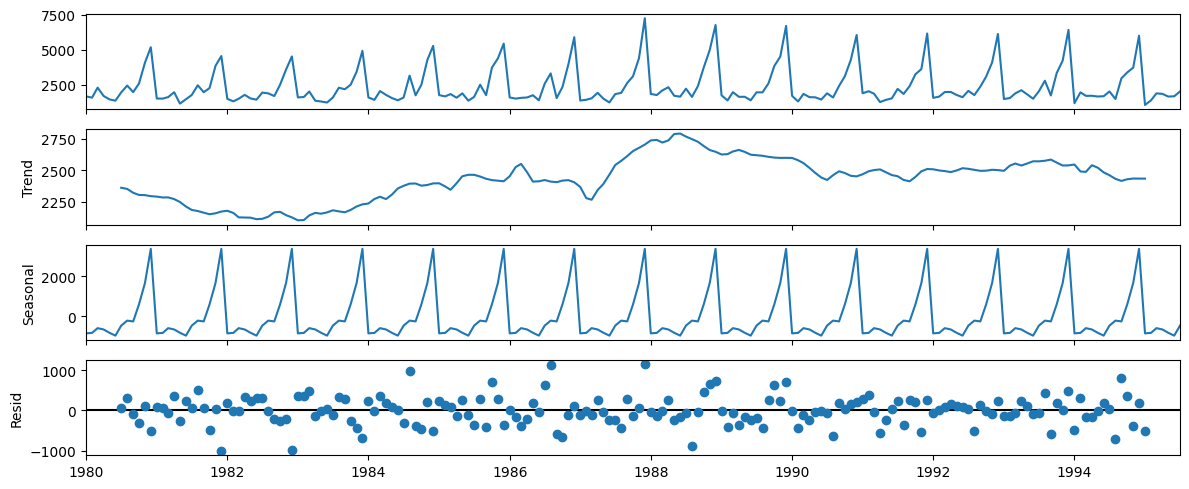

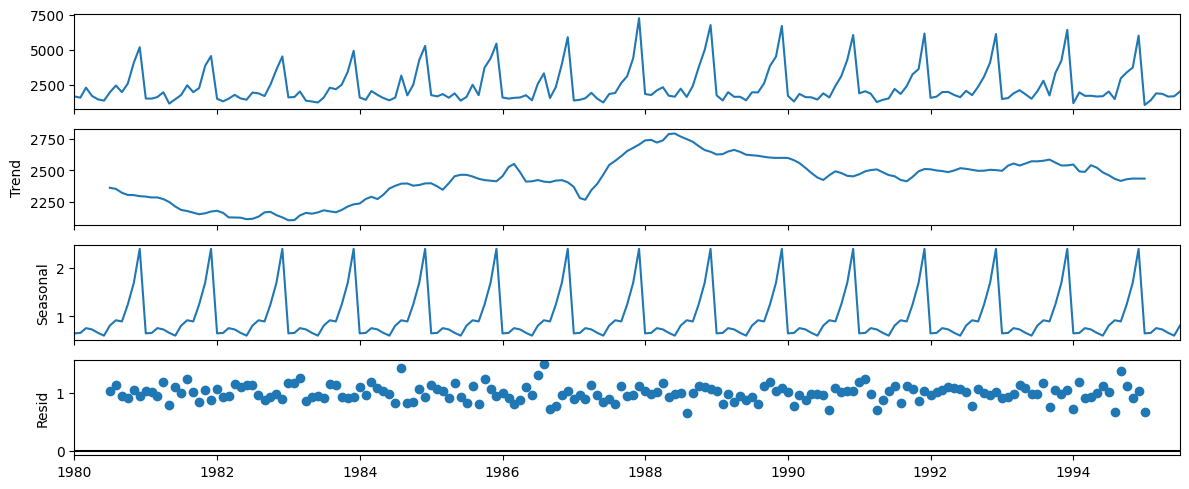

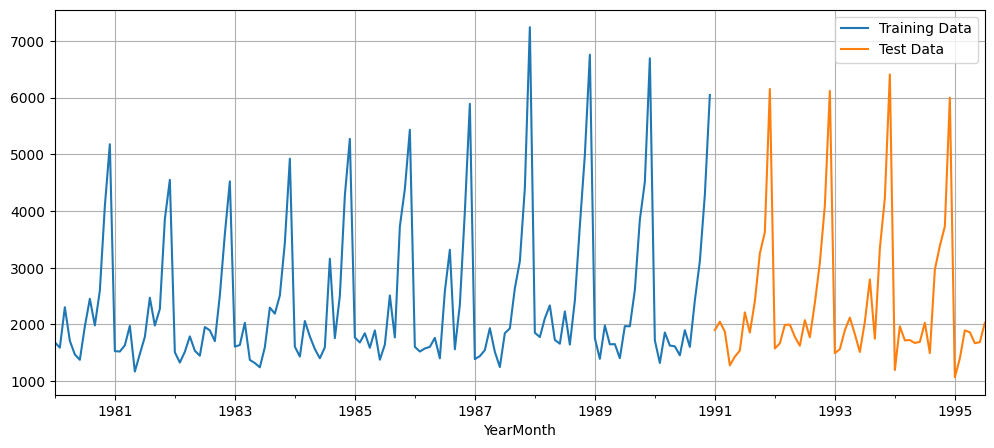

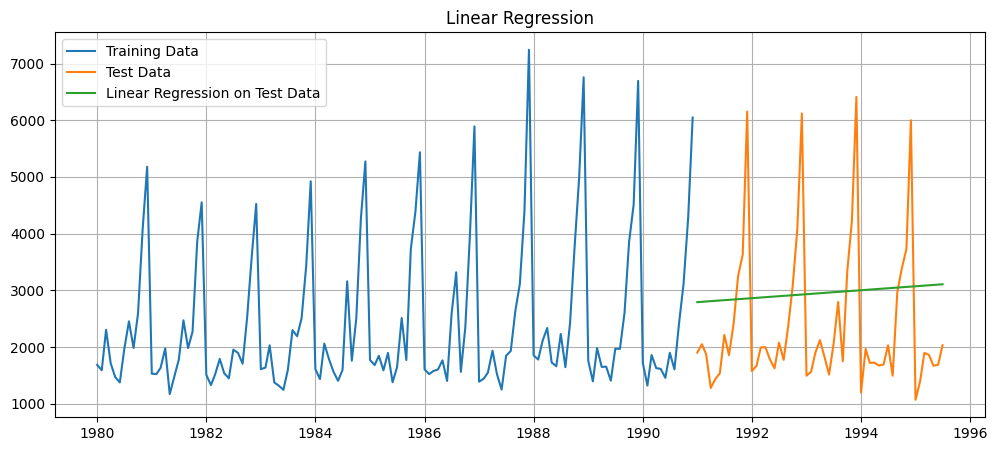

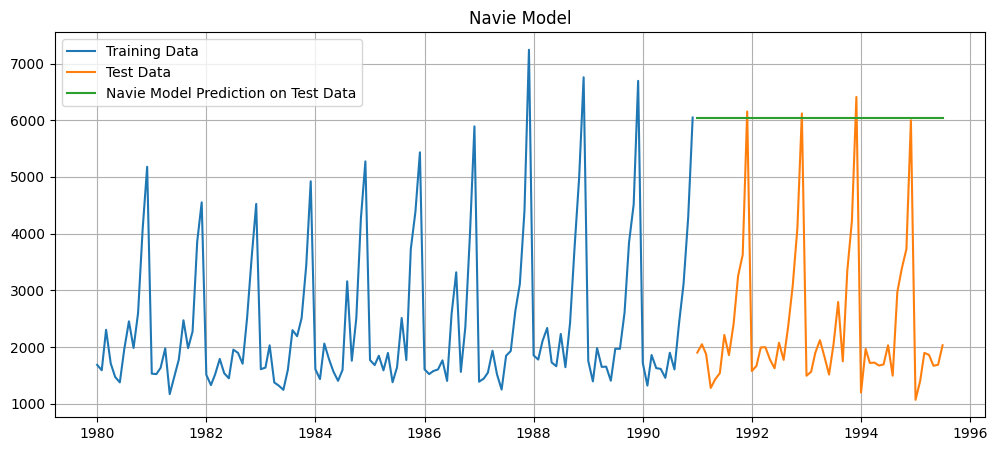

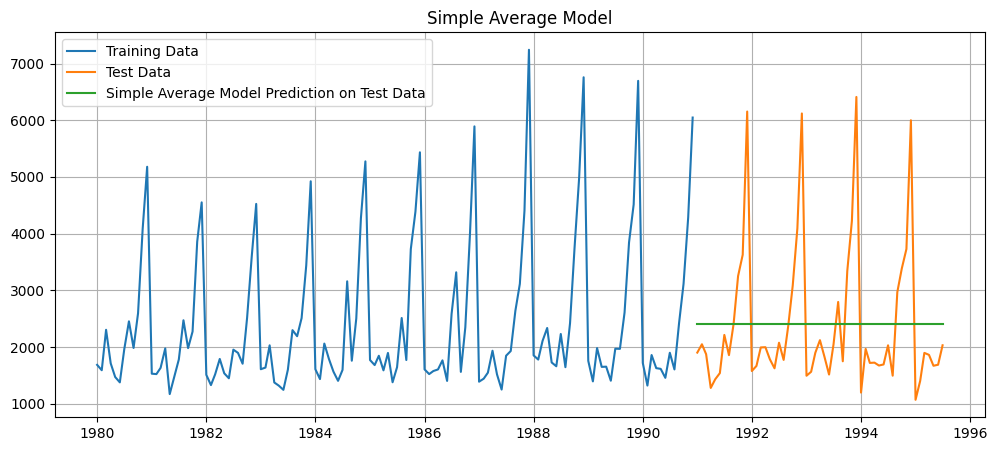

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


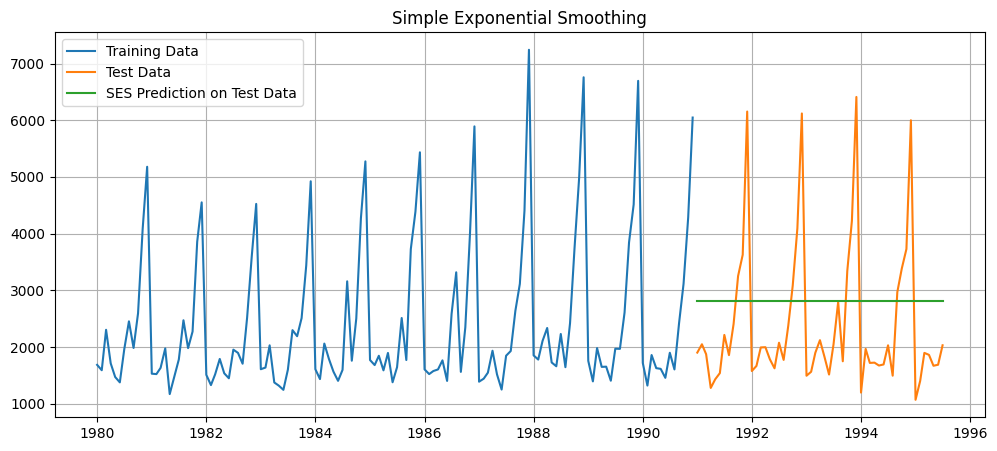

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


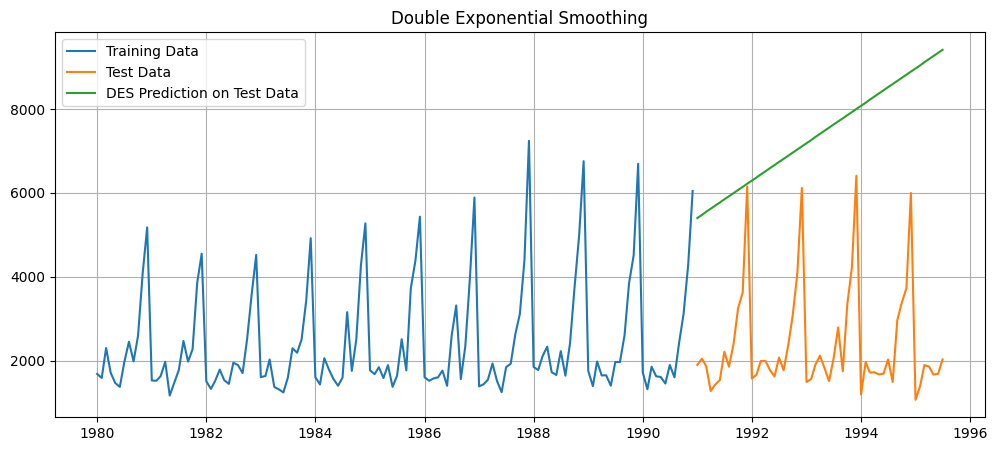

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


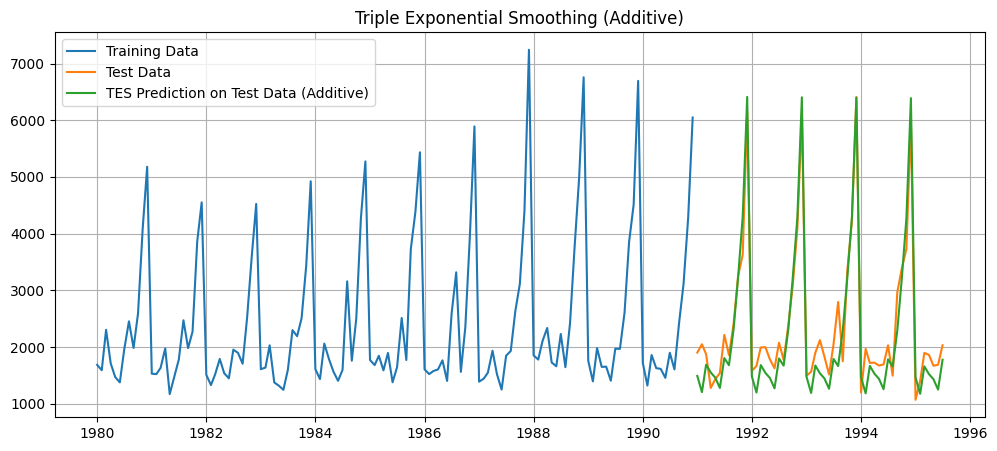

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


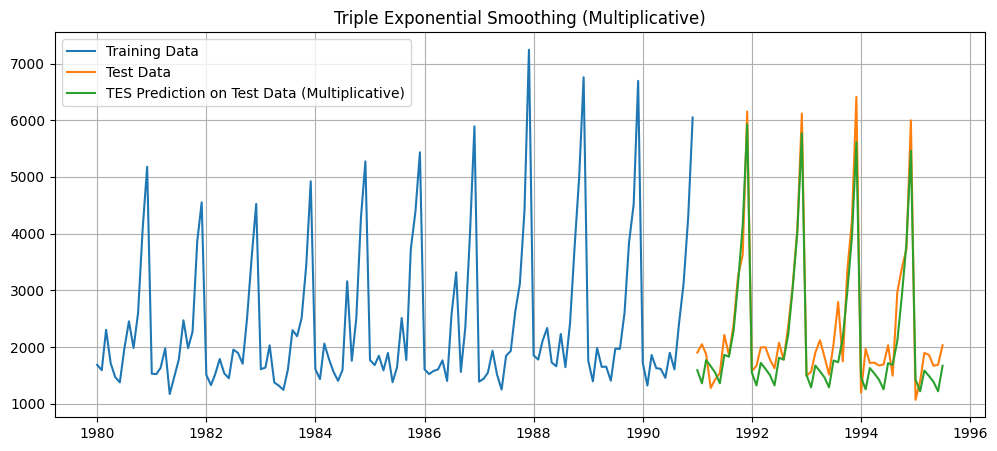

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-33-a3d7aa72b31a>:196: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_TES_ta_sm_autofit=model_TES_ta_sm.fit(smoothing_level=0.4,smoothing_slope=0.1,smoothing_seasonal=0.2,optimized=False,use_brute=True)


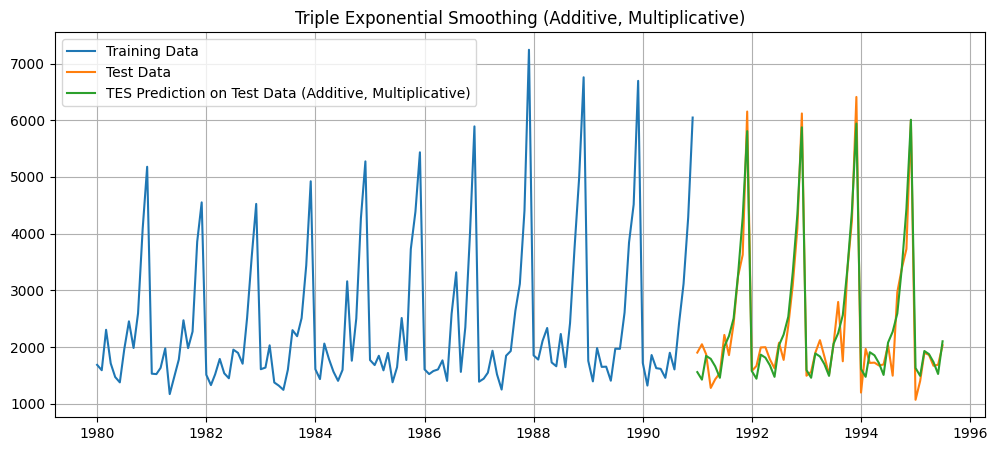

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-33-a3d7aa72b31a>:214: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_TES_full = model_TES_full.fit(smoothing_level=0.4,smoothing_slope=0.1,smoothing_seasonal=0.2,optimized=False,use_brute=True)


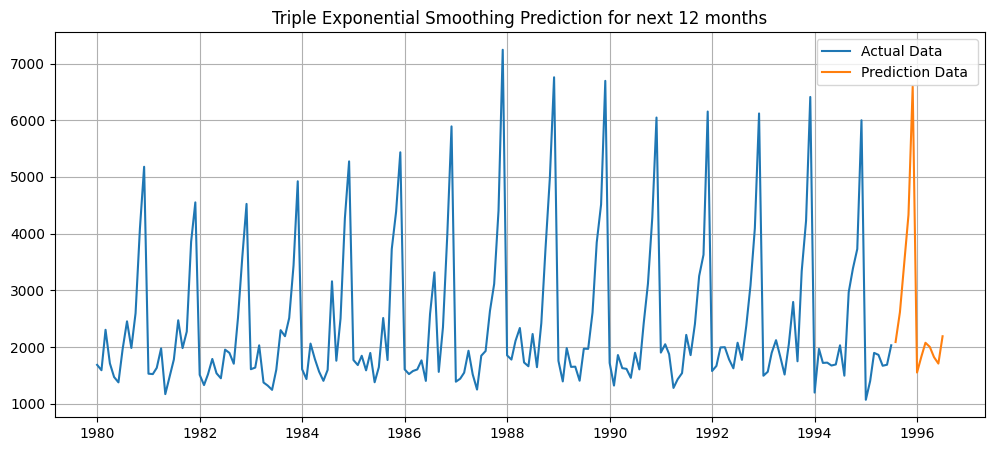

In [ ]:
#For numerical operations
import numpy as np

# For loading the excel data
import pandas as pd

# seaborn and matplotlib  packages are  used for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For time series and regression predictions
import statsmodels.tools.eval_measures as em
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from IPython.display import display


wine_sales_df=pd.read_csv(r'/content/Sparkling.csv',parse_dates=True,index_col=0)

#to increase the figure size of output
from pylab import rcParams
rcParams['figure.figsize']=12,5

#descriptive statistics
wine_sales_df.describe()

#line plot
wine_sales_df.plot()
plt.title('Line plot of Sparkling wine sales')
plt.grid()
plt.show()

#box plot
sns.boxplot(data=wine_sales_df,x=wine_sales_df['Sparkling'])
plt.title('Box plot of Sparkling wine sales')
plt.show()

#check for null values
wine_sales_df.isnull().sum()

#Additive decomposition
df_add_decompose=seasonal_decompose(wine_sales_df,model='additive')
df_add_decompose.plot()
plt.show()

#Multiplicative decomposition
df_mul_decompose=seasonal_decompose(wine_sales_df,model='multiplicative')
df_mul_decompose.plot()
plt.show()

#Splitting train and test data
train_data=wine_sales_df[wine_sales_df.index < '1991-01-01']
test_data=wine_sales_df[wine_sales_df.index>= '1991-01-01']

#Line plot of Training and Test data
train_data['Sparkling'].plot()
test_data['Sparkling'].plot()
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# function to calculate rmse value
def calculate_rmse(actual, predicted):
    return np.sqrt((mean_squared_error(actual, predicted)))

# 1.Linear Regression

train_time=[i+1 for i in range(len(train_data))]
test_time=[i+133 for i in range(len(test_data))]

LR_train=train_data.copy()
LR_test=test_data.copy()
LR_train['Time']=train_time
LR_test['Time']=test_time

LR=LinearRegression()
LR.fit(LR_train[['Time']],LR_train['Sparkling'])

LR_test_prediction_model=LR.predict(LR_test[['Time']])
LR_test['RegOnTime']=LR_test_prediction_model

plt.plot(train_data['Sparkling'],label='Training Data')
plt.plot(test_data['Sparkling'],label='Test Data')
plt.plot(LR_test['RegOnTime'],label='Linear Regression on Test Data')
plt.legend(loc='best')
plt.grid()
plt.title('Linear Regression')
plt.show()

results_df=pd.DataFrame({'Test RMSE':[calculate_rmse(test_data,LR_test_prediction_model)]},index=['Linear Regression'])

# 2.Navie model

NM_train = train_data.copy()
NM_test = test_data.copy()

NM_test['Sparkling'] = np.asarray(train_data['Sparkling'])[len(np.asarray(train_data['Sparkling']))-1]

plt.plot(train_data['Sparkling'],label='Training Data')
plt.plot(test_data['Sparkling'],label='Test Data')
plt.plot(NM_test['Sparkling'], label='Navie Model Prediction on Test Data')
plt.legend(loc='best')
plt.grid()
plt.title('Navie Model')
plt.show()

results_df_temp=pd.DataFrame({'Test RMSE':[calculate_rmse(test_data,NM_test['Sparkling'])]},index=['Navie Model'])
results_df=pd.concat([results_df,results_df_temp])


# 3. Simple Average Model

SAM_train = train_data.copy()
SAM_test = test_data.copy()

SAM_test['Forecast'] = train_data['Sparkling'].mean()

plt.plot(train_data['Sparkling'],label='Training Data')
plt.plot(test_data['Sparkling'],label='Test Data')
plt.plot(SAM_test['Forecast'], label='Simple Average Model Prediction on Test Data')
plt.legend(loc='best')
plt.grid()
plt.title('Simple Average Model')
plt.show()

results_df_temp=pd.DataFrame({'Test RMSE':[calculate_rmse(test_data,SAM_test['Forecast'])]},index=['Simple Average Model'])
results_df=pd.concat([results_df,results_df_temp])

# 4.Simple Exponential Smoothing
model_SES=SimpleExpSmoothing(train_data,initialization_method='estimated')
model_SES_autofit=model_SES.fit(optimized=True)

SES_predict=model_SES_autofit.forecast(steps=len(test_data))

plt.plot(train_data,label='Training Data')
plt.plot(test_data,label='Test Data')
plt.plot(SES_predict,label='SES Prediction on Test Data')
plt.legend(loc='best')
plt.grid()
plt.title('Simple Exponential Smoothing')
plt.show()

results_df_temp=pd.DataFrame({'Test RMSE':[calculate_rmse(test_data,SES_predict)]},index=['Simple Exponential Smoothing'])
results_df=pd.concat([results_df,results_df_temp])

# 5.Double Exponential Smoothing

model_DES=Holt(train_data,initialization_method='estimated')
model_DES_autofit=model_DES.fit()

DES_predict=model_DES_autofit.forecast(steps=len(test_data))

plt.plot(train_data,label='Training Data')
plt.plot(test_data,label='Test Data')
plt.plot(DES_predict,label='DES Prediction on Test Data')
plt.legend(loc='best')
plt.grid()
plt.title('Double Exponential Smoothing')
plt.show()

results_df_temp=pd.DataFrame({'Test RMSE':[calculate_rmse(test_data,DES_predict)]},index=['Double Exponential Smoothing'])
results_df=pd.concat([results_df,results_df_temp])

# 6.Triple Exponential Smoothing (Additive)
model_TES_ta_sa=ExponentialSmoothing(train_data,trend='additive',seasonal='additive',initialization_method='estimated')
model_TES_ta_sa_autofit=model_TES_ta_sa.fit()

TES_predict_ta_sa=model_TES_ta_sa_autofit.forecast(steps=len(test_data))

plt.plot(train_data,label='Training Data')
plt.plot(test_data,label='Test Data')
plt.plot(TES_predict_ta_sa,label='TES Prediction on Test Data (Additive)')
plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing (Additive)')
plt.show()

results_df_temp=pd.DataFrame({'Test RMSE':[calculate_rmse(test_data,TES_predict_ta_sa)]},index=['Triple Exponential Smoothing Forecast (Additive)'])
results_df=pd.concat([results_df,results_df_temp])

# 7.Triple Exponential Smoothing (Multiplicative)
model_TES_tm_sm=ExponentialSmoothing(train_data,trend='multiplicative',seasonal='multiplicative',initialization_method='estimated')
model_TES_tm_sm_autofit=model_TES_tm_sm.fit()

TES_predict_tm_sm=model_TES_tm_sm_autofit.forecast(steps=len(test_data))

plt.plot(train_data,label='Training Data')
plt.plot(test_data,label='Test Data')
plt.plot(TES_predict_tm_sm,label='TES Prediction on Test Data (Multiplicative)')
plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing (Multiplicative)')
plt.show()

results_df_temp=pd.DataFrame({'Test RMSE':[calculate_rmse(test_data,TES_predict_tm_sm)]},index=['Triple Exponential Smoothing Forecast (Multiplicative)'])
results_df=pd.concat([results_df,results_df_temp])

# 8.Triple Exponential Smoothing (Trend - Additive, Seasonal - Multiplicative)

model_TES_ta_sm=ExponentialSmoothing(train_data,trend='additive',seasonal='multiplicative',initialization_method='estimated')
model_TES_ta_sm_autofit=model_TES_ta_sm.fit(smoothing_level=0.4,smoothing_slope=0.1,smoothing_seasonal=0.2,optimized=False,use_brute=True)

TES_predict_ta_sm=model_TES_ta_sm_autofit.forecast(steps=len(test_data))

plt.plot(train_data,label='Training Data')
plt.plot(test_data,label='Test Data')
plt.plot(TES_predict_ta_sm,label='TES Prediction on Test Data (Additive, Multiplicative)')
plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing (Additive, Multiplicative)')
plt.show()

results_df_temp=pd.DataFrame({'Test RMSE':[calculate_rmse(test_data,TES_predict_ta_sm)]},index=['Alpha=0.4,Beta=0.1,Gamma=0.2 Triple Exponential Smoothing Forecast (Additive, Multiplicative)'])
results_df=pd.concat([results_df,results_df_temp])
results_df

# Predicted for future 12 months using TES (Trend - Additive, Seasonal - Multiplicative)
model_TES_full = ExponentialSmoothing(wine_sales_df,trend='additive',seasonal='multiplicative')
model_TES_full = model_TES_full.fit(smoothing_level=0.4,smoothing_slope=0.1,smoothing_seasonal=0.2,optimized=False,use_brute=True)

TES_predict=model_TES_full.forecast(12)

plt.plot(wine_sales_df, label='Actual Data')
plt.plot(TES_predict, label='Prediction Data ')
plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Prediction for next 12 months')
plt.show()


